# 

### ************** LABORATORIO NO. 2 **************

#### Johnatan Josué Ramírez Santiago
#### Carné: 19001825

# Ejercicio No. 1

In [2]:
from PIL import Image
import numpy as np

def imagen_binaria(image_path, threshold=128):
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)

    # Binarización
    conversion_binaria = np.where(image_array > threshold, 255, 0)
    imagen_convertida = Image.fromarray(np.uint8(conversion_binaria))
    return imagen_convertida

imagnen_final = imagen_binaria('Imagen_1.jpg', threshold=128)
imagnen_final.show()

# Ejercicio No. 2

In [19]:
def imagen_bin(img, threshold=128):
    gs_imagen = img.convert('L')
    img_array = np.array(gs_imagen)
    binario_arr = np.where(img_array > threshold, 255, 0)
    return binario_arr

def image_operations(img1, img2, threshold=128):
    imagen1 = Image.open(img1)
    imagen2 = Image.open(img2)
    assert imagen1.size == imagen2.size, "Las imágenes deben de ser del mismo tamaño"

# Convinamos las imagenes
    binarized_image1 = imagen_bin(imagen1, threshold)
    binarized_image2 = imagen_bin(imagen2, threshold)
    suma_imag = np.clip(np.array(imagen1) + np.array(imagen2), 0, 255) # SUMA
    resta_imag = np.clip(np.array(imagen1) - np.array(imagen2), 0, 255) # SUMA
    img_y = np.bitwise_and(binarized_image1, binarized_image2)
    img_o = np.bitwise_or(binarized_image1, binarized_image2)
    img_oy = np.bitwise_xor(binarized_image1, binarized_image2)

    # Convertimos a imagen nuevamente
    suma_imag = Image.fromarray(np.uint8(suma_imag))
    resta_imag = Image.fromarray(np.uint8(resta_imag))
    img_y = Image.fromarray(np.uint8(img_y))
    img_o = Image.fromarray(np.uint8(img_o))
    img_oy = Image.fromarray(np.uint8(img_oy))
    return suma_imag, resta_imag, img_y, img_o, img_oy

# ----------------------- Resultado ----------------------------
sum_img, subtract_img, and_img, or_img, xor_img = image_operations('Imagen(1).jpg', 'Imagen(2).jpg', threshold=128)
sum_img.show(title="Suma")
subtract_img.show(title="Resta")
and_img.show(title="AND")
or_img.show(title="OR")
xor_img.show(title="XOR")

# Ejercicio No. 3

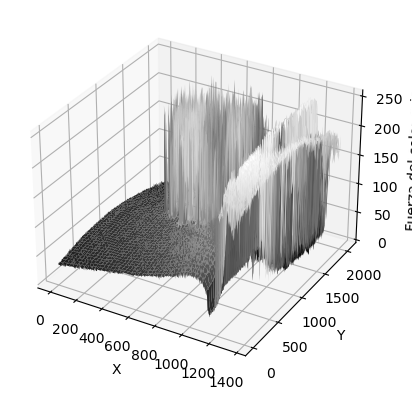

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_image_3d(imgp):
    imagen = Image.open(imgp).convert('L')
    
    imag_a = np.array(imagen)
    x_dim, y_dim = imag_a.shape
    y = np.arange(0, y_dim, 1)
    x = np.arange(0, x_dim, 1)
    x, y = np.meshgrid(x, y)
    z = imag_a.T

    figura = plt.figure()
    ax = figura.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='gray')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Fuerza del color gris')
    plt.show()

plot_image_3d('Imagen_1.jpg')

# Ejercicio No. 4

### Transformación Lineal

In [13]:
def trans_lineal(imagen, a=1, b=0):
    imagenn = Image.open(imagen).convert('L')
    imagen_a = np.array(imagenn)
    img_lineal = a * imagen_a + b
    img_lineal = np.clip(img_lineal, 0, 255) 
    return Image.fromarray(np.uint8(img_lineal))

imagen_lineal = trans_lineal('Imagen(2).jpg', a=1.2, b=20)
imagen_lineal.show(title="Imagen Lineal")

#### Transformación Negativa

In [14]:
def trans_negativa(imagen):
    imagenn = Image.open(imagen).convert('L')
    img_a = np.array(imagenn)
    negative_image = 255 - img_a
    return Image.fromarray(np.uint8(negative_image))

imagen_negativa = trans_negativa('Imagen(2).jpg')
imagen_negativa.show(title="Imagen Negativa")

#### Transformación Logarítmica

In [15]:
def trans_logaritmica(imagen, c=1):
    imagenn = Image.open(imagen).convert('L')
    img_a = np.array(imagenn)
    img_logaritmica = c * np.log1p(img_a)  # log1p es log(1 + p)
    img_logaritmica = np.clip(img_logaritmica * (255 / np.log(256)), 0, 255)  # Escalando el resultado
    return Image.fromarray(np.uint8(img_logaritmica))

imagen_logaritmica = trans_logaritmica('Imagen(2).jpg', c=30)
imagen_logaritmica.show(title="Imagen Logarítmica")

#### Transformación Exponencial

In [16]:
def trans_exponencial(imagenn, c=1):
    img = Image.open(imagenn).convert('L')
    img_a = np.array(img)
    img_exponencial = c * (np.exp(img_a / 255) - 1)
    img_exponencial = np.clip(img_exponencial * (255 / (np.exp(1) - 1)), 0, 255)  # Escalando el resultado
    return Image.fromarray(np.uint8(img_exponencial))

imagen_exponencial = trans_exponencial('Imagen(2).jpg', c=1)
imagen_exponencial.show(title="Imagen Exponencial")

# Ejercicio No. 5

## Kernel Laplaciano

####  Es un filtro utilizado en el procesamiento de imágenes para detectar bordes. Se basa en el operador Laplaciano, que es un operador de segundo orden en el cálculo diferencial. Este operador mide la segunda derivada de la intensidad de los píxeles en una imagen, es decir, cómo cambia la tasa de cambio de la intensidad de los píxeles en una imagen.
#### Cuando aplicamos el kernel Laplaciano a una imagen, estamos buscando áreas donde hay un cambio brusco en la intensidad de los píxeles, lo que indica la presencia de un borde. Estos cambios pueden ser tanto positivos como negativos, por lo que el operador Laplaciano detecta bordes donde la intensidad de la imagen pasa de claro a oscuro o de oscuro a claro.

## Diferencia de usar el algoritmo de Canny para la detección de bordes

####    * Simplicidad vs. Robustez: 
#### El kernel Laplaciano es simple de implementar y rápido, pero es sensible al ruido, a diferencia del algoritmo de Canny es más complejo y más lento, pero mucho más robusto frente al ruido.
####    * Operador de Segundo Orden vs. Primer Orden: 
#### El kernel Laplaciano utiliza la segunda derivada, lo que lo hace más propenso a amplificar el ruido, a diferencia dell algoritmo de Canny que utiliza la primera derivada, lo que permite un control más fino sobre la detección de bordes.
####    * Orientación de bordes: 
#### El algoritmo de Canny puede detectar bordes de diferentes orientaciones con mayor precisión, mientras que el Laplaciano no distingue entre direcciones.